# Machine Learning and Statistics
## Boston Housing dataset - Assginment

This report is to predict house prices in Boston suburb and the report is organized in such a way as to demonstrate the getting the data, cleaning the data, to exploratory analysis of the dataset to understand the distribution and importance of various features in influencing the house prices, to come up with a hypothesis and fitting a linear regression model.

This assignment is divided into 5 Sections

- Section 1 and 2 : Boston Housing Data Describtion and Inference
        - Data Description
        - Number of Bedrooms Versis Median Value of the homes
            - Description and Inference
            - R-Squred value 
            - Key Findings  
        
        - Lower status of the population (lstat) Versis Median Value of the homes
            - Description and Inference
            - R-Squred value 
            - Key Findings  
            
        - pupil-teacher ratio by town (ptratio) Versis Median Value of the homes
            - Description and Inference
            - R-Squred value 
            - Key Findings  
            
        -  T test - Inferential Statistics - House price analysis near charles river 
            - Key Findings
        
- Section 3 : Prediction
        - Prediction without Pre-Processing
            - Preparing the data
            - Building and Training
        
        - Prediction with Pre-Processed Data
            - One-off Scaling : Normalize the range of independent variables or features of data.
            - Fitting and Transforming 
            - Whitening 
            - Building and Training
    
         - Derive the optimisation and activation parameters    
         - Evaluate the model using inferred activation and Optimisation parameters
         
- Section 4 : Summary and key-findings


- Section 5 : References

 

### Section 1 & 2 : Data Description

The Boston housing dataset is taken from the Kaggle site and stored in the project assessment GIT repository. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The original information orginated from StatLib archive. The dataset set contains 506 entries and 14 parameters/variables/features.

The 14 features in the dataset are mentioned below

- crim   : per capita crime rate by town.
- zn     : proportion of residential land zoned for lots over 25,000 sq.ft.
- indus  : proportion of non-retail business acres per town.
- chas   : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox    : Nitrogen oxides concentration (parts per 10 million).
- rm     : average number of rooms per dwelling.
- age    : proportion of owner-occupied units built prior to 1940.
- dis    : weighted mean of distances to five Boston employment centres.
- rad    : index of accessibility to radial highways.
- tax    : full-value property-tax rate per \USD 10,000.
- ptratio: pupil-teacher ratio by town.
- black  : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat  : lower status of the population (percent).
- medv   : median value of owner-occupied homes in \USD 1000s.


In [1]:
#Load pandas library. 
#create a dataframe using the Boston housing data (df_BHD) 
#DDescribe the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_BHD = pd.read_csv("data\data.csv")
df_BHD.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- The above table provides key description of the data
    - Number of data entries in the data set [count]
    - Average/Mean of the each column of data in the data set [mean]
    - Standard diviation from from the mean of the data set [std]
    - Minimum value of the data in the data set [min]
    - Maximum value of the data in the data set [max]
    
- Seabourne distribution plot is used to determine which independent variable to be used within the Boston Housing dataset
- Based on the given data and the seabourne distribution plot of the data, the below independent variables doesn't seem to be related to medianvalue of the house
    - the crime rate
    - proporation of non-retail business acres
    - age of the house owners
    - distance of the five Boston employment town centres
    - index of accessibility to raidal highways
    - property tax rate
    - Proproation of blacks by towbn


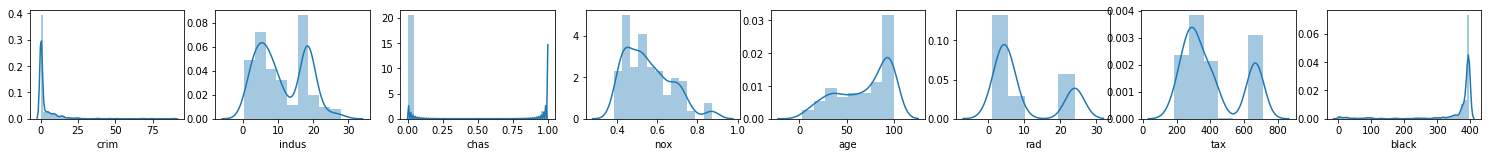

In [2]:
# distribution plot of the independent variables to see which one to pick-up
fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8,figsize=(26,2))
sns.distplot(df_BHD['crim'],ax=ax1)
sns.distplot(df_BHD['indus'],ax=ax2)
sns.distplot(df_BHD['chas'],ax=ax3)
sns.distplot(df_BHD['nox'],ax=ax4)
sns.distplot(df_BHD['age'],ax=ax5)
sns.distplot(df_BHD['rad'],ax=ax6)
sns.distplot(df_BHD['tax'],ax=ax7)
sns.distplot(df_BHD['black'],ax=ax8)

### Section 1 & 2: Description and Inference : Number of Bedrooms Vs Median Value of the homes
- Median Value of the homes is the dependent variable and the rest of the features in the dataset are indepedent variables
- Plot the Median value of the homes and number of bedrooms using seaborn plot to identify any outliers

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


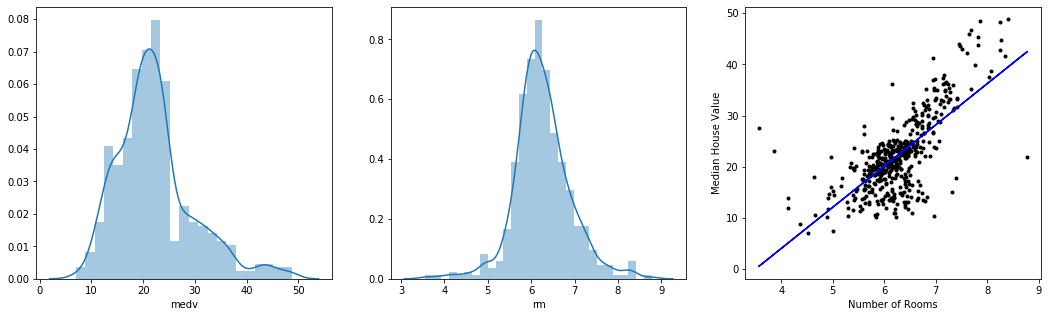

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,5))

# plot the median house value against the number of rooms
# remove the outliers. Consider only the data that are with median house of 49 and below
# Remove 20 outlier rows from the dataset
# House price less than 10 M where the number of rooms are greater than zero
# Median value of the about 49M and the number of Rooms

#Copy of the dataset.orginal data set
df_BHD_subset = df_BHD

df_BHD_sub = df_BHD[(df_BHD['medv'] < 10) & (df_BHD['rm'] > 5 ) ]
for row in df_BHD_sub.index:
    df_BHD_subset = df_BHD_subset.drop(row)

df_BHD_subset = df_BHD_subset[(df_BHD['medv'] < 49)]
                                              
sns.distplot(df_BHD_subset['medv'],ax=ax1)
sns.distplot(df_BHD_subset['rm'],ax=ax2)

# plot the data (number of rooms  versis  Median House value)
ax3.plot(df_BHD_subset['rm'],df_BHD_subset['medv'],'k.', label='Original data')

#Calcuate the polyfit co-efficients using numpy
#the value of m is 8.05 and the value of c is -28.18
m,c = np.polyfit(df_BHD_subset['rm'],df_BHD_subset['medv'], 1)

#plot the fitted line
ax3.plot(df_BHD_subset['rm'],((8.05 * df_BHD_subset['rm']) -28.18),'b-', label='Best fit line')

plt.xlabel('Number of Rooms')
plt.ylabel('Median House Value')

# Show the plot.
plt.show()


In [4]:
np.polyfit(df_BHD_subset['rm'],df_BHD_subset['medv'], 1)

array([  8.05466675, -28.17761105])

####  Section 1 & 2 :: R-Squred value  ::   Number of Bedrooms Vs Median Value of the homes


In [5]:
# Import packages and classes from sklearn
# Use the corrected data (outliers removed)
# Create model and fit the curve/line
# print the results

from sklearn.linear_model import LinearRegression
y = df_BHD_subset['rm'].values
y = y.reshape((-1,1))
x = df_BHD_subset['medv'].values
x = x.reshape((-1,1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.5001095298788084
intercept: [4.8796504]
slope: [[0.06208941]]


#### Section 1 & 2 :: Key Findings  ::   Number of Bedrooms Vs Median Value of the homes 
- The median value of the house is normally distributed with few outliers especially around the value 50
- The intial distribution showed outlier data around median house value = 50. There are 16 entries of outlier data is removed from the dataset. 
- The data is distributed around the median house value 20
- The stright line can be expressed in the format y= mx + c. Using polyfit function, the values of m is calucated as 8.05 and the value of c is -28.18. The stright line seems to roughly fits the data.
- R-Squred values
   - coefficient of determination: 0.5001095298788084
   - intercept: 4.8796504
   - slope: 0.06208941


### Section 1 & 2 :: Description & Inference : Lower status of the population (lstat) Vs Median Value of the homes
- Median Value of the homes is the dependent variable and the rest of the features in the dataset are indepedent variables
- Plot the Median value of the homes and lstat using seaborn plot to identify any outliers

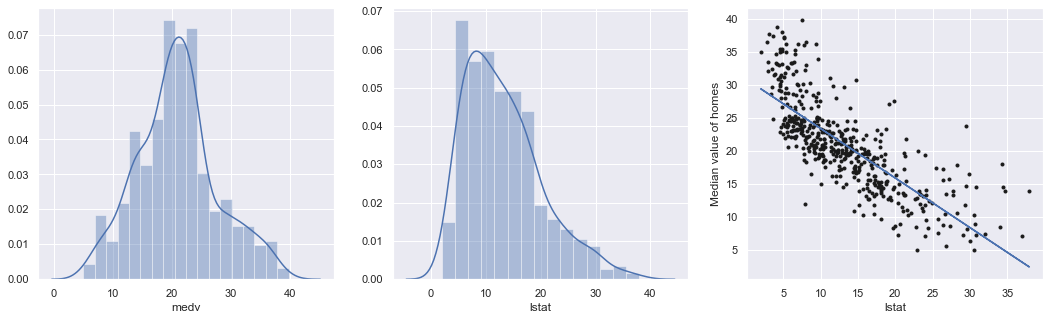

In [47]:

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(18,5))

# plot the median house value against the lstat
# remove the outliers. 
#Copy of the dataset.orginal data set

df_BHD_slstat = df_BHD[(df_BHD['medv'] <40)]
                                              
sns.distplot(df_BHD_slstat['medv'],ax=ax1)
sns.distplot(df_BHD_slstat['lstat'],ax=ax2)

# plot the data (number of rooms  versis  Median House value)
ax3.plot(df_BHD_slstat['lstat'],df_BHD_slstat['medv'],'k.', label='Original data')

#Calcuate the polyfit co-efficients using numpy
#the value of m is -0.75 and the value of c is 30.84
np.polyfit(df_BHD_slstat['lstat'],df_BHD_slstat['medv'], 1)

#plot the fitted line
ax3.plot(df_BHD_slstat['lstat'],((-0.75 * df_BHD_slstat['lstat']) + 30.84),'b-', label='Best fit line')

plt.xlabel('lstat')
plt.ylabel('Median value of homes')

# Show the plot.
plt.show()



####  Section 1 &  2 :: R-Squred value  ::   Lower Status of population and Median Value of the homes

In [45]:
# Import packages and classes from sklearn
# Use the corrected data (outliers removed)
# Create model and fit the curve/line
# print the results

from sklearn.linear_model import LinearRegression
y = df_BHD_slstat['lstat'].values
y = y.reshape((-1,1))
x = df_BHD_slstat['medv'].values
x = x.reshape((-1,1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.600848885538303
intercept: [29.90743951]
slope: [[-0.79880106]]


#### Section 1 & 2 :: Key Findings  ::   Lower status of population and Median Value of the homes 
- The median value of the house is normally distributed with few outliers especially around the value 50
- The data is distributed around the median house value 20
- The stright line can be expressed in the format y= mx + c. Using polyfit function, the values of m is calucated as -.75 and the value of c is 30.84. The stright line seems to roughly fits the data.
- R-Squred values
   - coefficient of determination: 0.600848885538303
   - intercept: 29.90743951
   - slope: -0.79880106


### Section 1 & 2 :: Description & Inference : pupil-teacher ratio by town (ptratio) Vs Median Value of the homes
- Median Value of the homes is the dependent variable and the rest of the features in the dataset are indepedent variables
- Plot the Median value of the homes and Ptraio using seaborn plot to identify any outliers


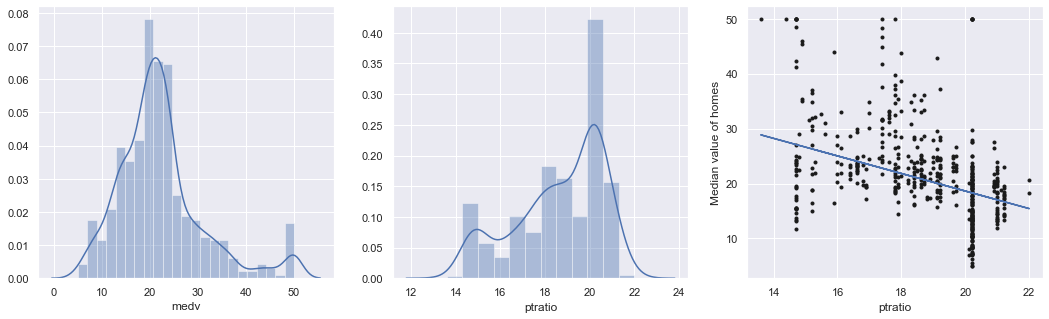

In [46]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(18,5))

# plot the median house value against the ptratio
# remove the outliers. 
#Copy of the dataset.orginal data set

df_BHD_ptraio = df_BHD[(df_BHD['ptratio'] >13)]
                                              
sns.distplot(df_BHD_ptraio['medv'],ax=ax1)
sns.distplot(df_BHD_ptraio['ptratio'],ax=ax2)

# plot the data (number of rooms  versis  Median House value)
ax3.plot(df_BHD_ptraio['ptratio'],df_BHD_ptraio['medv'],'k.', label='Original data')

#Calcuate the polyfit co-efficients using numpy
#the value of m is -0.84 and the value of c is 32.54
-1.59709077, 50.62687252
np.polyfit(df_BHD_ptraio['ptratio'],df_BHD_ptraio['medv'], 1)

#plot the fitted line
ax3.plot(df_BHD_ptraio['ptratio'],((-1.60 * df_BHD_ptraio['ptratio']) + 50.63),'b-', label='Best fit line')

plt.xlabel('ptratio')
plt.ylabel('Median value of homes')

# Show the plot.
plt.show()


####  Section 1 & 2 :: R-Squred value  ::   pupil-teacher ratio by town and Median Value of the homes

In [9]:
# Import packages and classes from sklearn
# Use the corrected data (outliers removed)
# Create model and fit the curve/line
# print the results

from sklearn.linear_model import LinearRegression
y = df_BHD_ptraio['ptratio'].values
y = y.reshape((-1,1))
x = df_BHD_ptraio['medv'].values
x = x.reshape((-1,1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.2059313261967224
intercept: [20.84645673]
slope: [[-0.1005716]]


### T test - Inferential Statistics - House price analysis near charles river 

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

Key Assumptions: 
- The samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow the normal distribution
- The variances between the two groups are equal

In [10]:
# Seabourne plot of median house prices near and far from the charles river
import researchpy as rp
from scipy import stats

#show descriptive Statistics
df_BHD_slstat.groupby("chas")['medv'].describe()

,count,mean,std,min,25%,50%,75%,max
chas,,,,,,,,
0,447.0,20.763311,6.841498,5.0,16.200,20.50,24.100,39.8
1,28.0,23.192857,5.706587,13.4,19.825,22.15,26.775,35.2


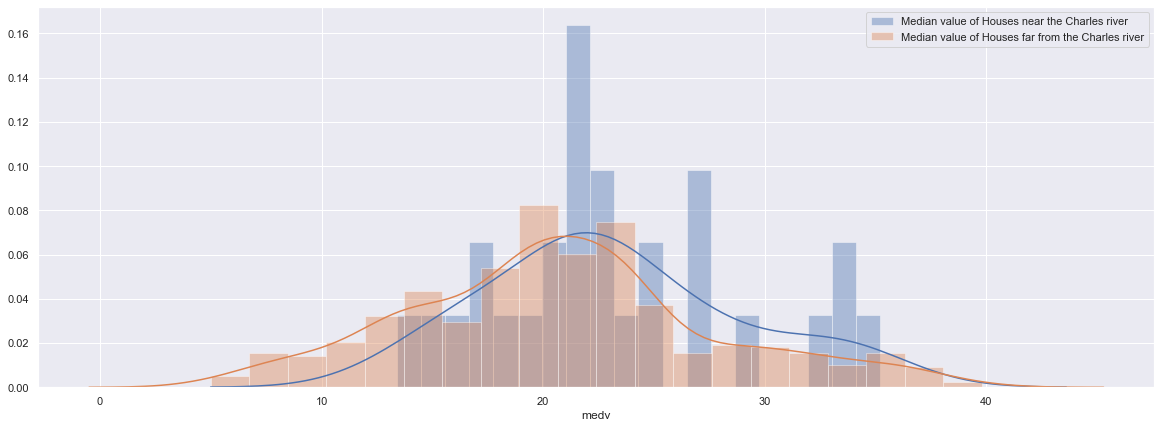

In [11]:
# Distribution of the data 
# set the map/graph size
# filer the median value of the houses based on the nearest to charles river
# plot the graph
sns.set(rc={'figure.figsize':(20,7)})
sns.distplot(df_BHD_slstat.loc[df_BHD_slstat['chas'] == 1, "medv"],bins=20,label='Median value of Houses near the Charles river')
sns.distplot(df_BHD_slstat.loc[df_BHD_slstat['chas'] == 0, "medv"],bins=20,label='Median value of Houses far from the Charles river')

plt.legend()
plt.show()

In [12]:
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(df_BHD_slstat.groupby("chas")['medv'])

,N,Mean,SD,SE,95% Conf.,Interval
chas,,,,,,
0,447,20.763311,6.841498,0.323592,20.12836,21.398261
1,28,23.192857,5.706587,1.078444,21.04032,25.345394


In [13]:
# Levene's test and calculate the pvalue
stats.levene(df_BHD_slstat.loc[df_BHD_slstat['chas'] == 1, "medv"], df_BHD_slstat.loc[df_BHD_slstat['chas'] == 0, "medv"])

LeveneResult(statistic=1.2559901564309797, pvalue=0.26298014955305266)

In [14]:
# Provides the descriptive t test results

descriptives, results = rp.ttest(df_BHD_slstat.loc[df_BHD_slstat['chas'] == 1, "medv"], 
                                 df_BHD_slstat.loc[df_BHD_slstat['chas'] == 0, "medv"])

descriptives
results

,Independent t-test,results
0,Difference (medv - medv) =,2.4295
1,Degrees of freedom =,473.0000
2,t =,1.8389
3,Two side test p value =,0.0666
4,Difference > 0 p value =,0.9667
5,Difference < 0 p value =,0.0333
6,Cohen's d =,0.3582
7,Hedge's g =,0.3577
8,Glass's delta =,0.4257
9,r =,0.0843


### Key findings :: T test results
- There is no significant difference between the median house prices based on the proximity to the charles river. 
- There is a statistically NO significant difference based on the house location in charles river ( p> 0.9, r= 0.843). 

# Section:3    Prediction


### Prediction without Pre-Processing
- Preparing the data
- Building and Training

### Prediction with Pre-Processed Data
- Pre-Processing
    - One-off Scaling : Normalize the range of independent variables or features of data.
    - Fitting and Transforming 
    - Whitening 
    - Building and Training
    
### Derive the optimisation and activation parameters    

### Evaluate the model using inferred activation and Optimisation parameters




In [15]:
# For neural networks.
import keras as kr
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

Using TensorFlow backend.


In [16]:
df_BHD_rmOutliers = df_BHD

df_BHD_sub = df_BHD[(df_BHD['medv'] < 10) & (df_BHD['rm'] > 5 ) ]
for row in df_BHD_sub.index:
    df_BHD_rmOutliers = df_BHD_rmOutliers.drop(row)

df_BHD_rmOutliers = df_BHD_rmOutliers[(df_BHD['medv'] < 49)]

df_BHD_rmOutliers.head(10)

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [17]:
# Based on the data analysis; used only below features for the prediction
# input ::  rm - Number of Rooms
# input ::  LSTAT - Lower status of population
# input ::  ptratio - Teacher - pupil ratio
# input ::  Chas - House near charles river
# Target/Output :: Median value of the homes

x = df_BHD_rmOutliers.iloc [:,[5,10,12,13]]
x.head(10)


,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


In [18]:
x = df_BHD_rmOutliers[['rm', 'ptratio', 'lstat']]
y = df_BHD_rmOutliers['medv']
x.head(2)

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14


In [19]:
y.head(2)

0    24.0
1    21.6
Name: medv, dtype: float64

In [20]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

### Building and Training

In [21]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=3, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="softplus"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [22]:
m.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)

In [23]:
m.predict(x_test).round().T

array([[16., 21., 32., 23., 27., 18., 28., 16., 16., 17., 22., 20., 19.,
        22., 16., 20., 20., 35., 14., 22., 14., 30., 19., 17., 19., 18.,
        21., 20., 25., 23., 15., 15., 18., 18., 17., 22., 20., 25., 23.,
        19., 17., 34., 15., 19., 24., 22., 18., 18., 26., 21., 20., 24.,
        37., 13., 21., 23., 27., 18., 22., 16., 19., 19., 23., 19., 18.,
        27., 17., 22., 22., 28., 33., 26., 14., 15., 15., 33., 16., 21.,
        18., 16., 17., 16., 41., 17., 13., 28., 20., 16., 20., 26., 15.,
        14., 23., 24.]], dtype=float32)

In [24]:
y_test.as_matrix().astype(np.float32)

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([23.1, 21.2, 35.4, 26.5, 16.5, 19.6, 27.1, 23.2, 17.8, 14.5, 21.2,
       15. , 21.2, 21.5, 22.5, 17.1, 21. , 34.9, 17.2, 20.6, 12.3, 31.6,
       21.7, 19.5, 15.6, 20.8, 21.4, 23. , 23.6, 23.2, 13.4, 17.8, 14.3,
       20.6, 20.1, 20.4, 20. , 25.1, 22.9, 21.7, 16.6, 32. , 13.4, 15. ,
       22.9, 27.5, 19.4, 20.3, 26.7, 20. , 22.5, 24.2, 46.7, 13.8, 20.8,
       23.8, 23.9, 17.1, 19.3, 10.9, 19.2, 19.6, 23.9, 18.5, 20. , 32.5,
       18.9, 29.8, 19.1, 22. , 29.8, 33. , 17.3, 13.4, 11.5, 34.7, 14.8,
       22.4, 18. , 13.5, 27.5, 23.1, 48.8, 22.4,  7. , 24.1, 19.9, 17.8,
       21.7, 23.2, 13.3, 19.3, 21.6, 25.2], dtype=float32)

In [25]:
m.evaluate(x_test, y_test)

94/94 [==============================] - 0s 850us/step


[13.239118657213576, 0.021276595070958138]

In [26]:
# Based on the data analysis; used only below features for the prediction
# input ::  rm - Number of Rooms
# input ::  LSTAT - Lower status of population
# input ::  ptratio - Teacher - pupil ratio
# Target/Output :: Median value of the homes

x = df_BHD_rmOutliers.iloc [:,[5,10,12]]

#### One-off Scaling

In [27]:
xscale = pd.DataFrame(pre.scale(x), columns=x.columns)
xscale.head(10)

,rm,ptratio,lstat
0,0.479554,-1.480447,-1.110281
1,0.243901,-0.303697,-0.484956
2,1.412984,-0.303697,-1.253084
3,1.126834,0.119933,-1.416931
4,1.354836,0.119933,-1.057670
5,0.257673,0.119933,-1.075708
6,-0.381956,-1.527517,0.009593
7,-0.137122,-1.527517,1.019734
8,-0.964968,-1.527517,2.640170
9,-0.394198,-1.527517,0.711581


### Fitting and Transforming

In [28]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.mean_, scaler.scale_


(array([ 6.288704  , 18.376     , 12.10066667]),
 array([0.64459239, 2.14238745, 6.59823106]))

In [29]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=3, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="softplus"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [30]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)

In [31]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[15., 21., 32., 24., 27., 17., 28., 15., 15., 17., 22., 18., 18.,
        22., 16., 19., 21., 34., 13., 22., 13., 31., 19., 15., 19., 16.,
        21., 20., 25., 22., 14., 14., 18., 17., 16., 21., 18., 25., 23.,
        18., 17., 31., 15., 20., 25., 23., 17., 18., 27., 21., 19., 24.,
        35., 10., 21., 24., 27., 18., 21., 16., 19., 19., 23., 17., 17.,
        27., 16., 23., 22., 27., 30., 28., 14., 16., 13., 32., 16., 22.,
        18., 16., 13., 12., 40., 17., 10., 26., 19., 16., 20., 25., 14.,
        13., 23., 24.]], dtype=float32)

In [32]:
y_test.as_matrix().astype(np.float32)

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([23.1, 21.2, 35.4, 26.5, 16.5, 19.6, 27.1, 23.2, 17.8, 14.5, 21.2,
       15. , 21.2, 21.5, 22.5, 17.1, 21. , 34.9, 17.2, 20.6, 12.3, 31.6,
       21.7, 19.5, 15.6, 20.8, 21.4, 23. , 23.6, 23.2, 13.4, 17.8, 14.3,
       20.6, 20.1, 20.4, 20. , 25.1, 22.9, 21.7, 16.6, 32. , 13.4, 15. ,
       22.9, 27.5, 19.4, 20.3, 26.7, 20. , 22.5, 24.2, 46.7, 13.8, 20.8,
       23.8, 23.9, 17.1, 19.3, 10.9, 19.2, 19.6, 23.9, 18.5, 20. , 32.5,
       18.9, 29.8, 19.1, 22. , 29.8, 33. , 17.3, 13.4, 11.5, 34.7, 14.8,
       22.4, 18. , 13.5, 27.5, 23.1, 48.8, 22.4,  7. , 24.1, 19.9, 17.8,
       21.7, 23.2, 13.3, 19.3, 21.6, 25.2], dtype=float32)

In [33]:
m.evaluate(x_test_scaled, y_test)

94/94 [==============================] - 0s 940us/step


[15.29541218534429, 0.021276595070958138]

### whitening

In [34]:
x_train.corr()

,rm,ptratio,lstat
rm,1.000000,-0.295416,-0.636973
ptratio,-0.295416,1.000000,0.346894
lstat,-0.636973,0.346894,1.000000


In [35]:
pca = dec.PCA(n_components=3, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white.head(10)

,rm,ptratio,lstat
0,-0.274609,-0.534685,-0.844742
1,-0.480712,2.521256,1.255513
2,0.878503,-0.551097,0.888544
3,-0.313189,-0.147452,-0.894978
4,-0.863889,-0.118588,-0.257182
5,0.678751,-0.635920,0.544257
6,-0.868606,1.244153,0.173281
7,0.237785,-0.018349,-0.546450
8,1.033298,-0.892279,0.641487
9,0.490587,-0.715462,0.274251


In [36]:
x_train_white.corr().round()

,rm,ptratio,lstat
rm,1.0,-0.0,-0.0
ptratio,-0.0,1.0,0.0
lstat,-0.0,0.0,1.0


In [37]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=3, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="softplus"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [38]:
m.fit(x_train_white, y_train, epochs=100, batch_size=10, verbose=0)

In [39]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[33., 23., 13., 18., 16., 29., 16., 29., 29., 25., 23., 29., 26.,
        22., 31., 28., 20., 12., 38., 22., 38., 13., 23., 31., 28., 32.,
        23., 23., 18., 23., 31., 37., 24., 29., 32., 24., 28., 17., 22.,
        26., 28., 14., 35., 22., 19., 19., 26., 27., 15., 22., 26., 19.,
        11., 48., 23., 20., 16., 24., 25., 24., 23., 24., 20., 30., 27.,
        17., 30., 17., 23., 17., 15., 14., 34., 24., 38., 13., 29., 20.,
        24., 30., 44., 45.,  9., 30., 47., 19., 28., 29., 25., 19., 31.,
        38., 21., 21.]], dtype=float32)

In [40]:
y_test.as_matrix().astype(np.float32)

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([23.1, 21.2, 35.4, 26.5, 16.5, 19.6, 27.1, 23.2, 17.8, 14.5, 21.2,
       15. , 21.2, 21.5, 22.5, 17.1, 21. , 34.9, 17.2, 20.6, 12.3, 31.6,
       21.7, 19.5, 15.6, 20.8, 21.4, 23. , 23.6, 23.2, 13.4, 17.8, 14.3,
       20.6, 20.1, 20.4, 20. , 25.1, 22.9, 21.7, 16.6, 32. , 13.4, 15. ,
       22.9, 27.5, 19.4, 20.3, 26.7, 20. , 22.5, 24.2, 46.7, 13.8, 20.8,
       23.8, 23.9, 17.1, 19.3, 10.9, 19.2, 19.6, 23.9, 18.5, 20. , 32.5,
       18.9, 29.8, 19.1, 22. , 29.8, 33. , 17.3, 13.4, 11.5, 34.7, 14.8,
       22.4, 18. , 13.5, 27.5, 23.1, 48.8, 22.4,  7. , 24.1, 19.9, 17.8,
       21.7, 23.2, 13.3, 19.3, 21.6, 25.2], dtype=float32)

In [41]:
m.evaluate(x_test_white, y_test)

94/94 [==============================] - 0s 957us/step


[187.32066247818318, 0.010638297535479069]

### Derive the optimisation and activation parameters


In [42]:
## The program is functionalised to try different optimisers and activiation model
## The number of features/variables are kept to 3 based on the earlier anlysis.
## This program is used to find the relvenat optimsation and Activation parameters

CHECK = "False"

if (CHECK=="yes"):
        
    ## Removing the outlier data from
    ###      1) median value of the house
    ###      2) Number of rooms
    ###      3) Teach pupil ratio

    def Outlier():
        df_BHD_rmOutliers = df_BHD
        df_BHD_sub = df_BHD[(df_BHD['medv'] < 10) & (df_BHD['rm'] > 5 ) ]
        for row in df_BHD_sub.index:
            df_BHD_rmOutliers = df_BHD_rmOutliers.drop(row)
        df_BHD_rmOutliers = df_BHD_rmOutliers[(df_BHD['medv'] < 49)]
        df_BHD_rmOutliers.head(10)

    #Pass the required dataframe to the function and decide the training data set
    # inputs : Number of rooms, techer pupil ratio and lower status of the population
    # output : Median value of the house
    def data(df_BHD_rmOutliers):
        x = df_BHD_rmOutliers[['rm', 'ptratio', 'lstat']]
        y = df_BHD_rmOutliers['medv']
        x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

    # Preprocessing the data
    def Preprocessing():
        scaler = pre.StandardScaler()
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)


    # Data model execution by passing the optimiser and activiation parameters
    def Datamodel(optimiser, activation1, activation2):
        m = kr.models.Sequential()
        m.add(kr.layers.Dense(20, input_dim=3, activation=activation1))
        m.add(kr.layers.Dense(50, activation=activation2))
        m.add(kr.layers.Dense(1, activation="linear"))
        m.compile(loss="mean_squared_error", optimizer=optimiser)

    def modelfit(activiation1, activiation2):
        m.fit(x_train, y_train, epochs=100, batch_size=10,verbose=0)
        print("Optimser :" + optimiser + " & Activation:" + activiation1 + " & Activation:" + activiation2)
        print(m.evaluate(x_test, y_test))

    # copy the full dataset to the outliers dataframe
    df_BHD_rmOutliers = df_BHD

    # remove the outliers
    Outlier()
    data(df_BHD_rmOutliers)

    # Loop through different optimiser and activiation models in keras
    # Based on multiple iternations (TRIAL and ERROR), it understood that few activation functions and optimisers
    #   are not producing desired results 
    for optimiser in ("adam","Nadam","Adamax","Adadelta","Adagrad","RMSprop"):
        for activiation1 in ('elu','softplus','softsign','sigmoid'):
            for activiation2 in ('elu','softplus','softsign','relu','tanh','sigmoid'):
                if (activiation1!=activiation2):
                    Datamodel(optimiser,activiation1, activiation2)
                    modelfit(activiation1, activiation2)      
                


        
       

### Evaluate the model using the identified activation and Optimisation parameters

In [43]:
# The best optimisation parameters caluclated from the above step are listed below

#Optimiser  : Adam
#Activation : softsign
#Activation : tanh
#Activation : linear

# Use the above parameters in the kera's neural funcitons 

## Removing the outlier data from
###      1) median value of the house
###      2) Number of rooms
###      3) Teach pupil ratio

### suppress the warning messages to make the output neat and clean

import warnings
warnings.filterwarnings("ignore")

def Outlier():
    df_BHD_rmOutliers = df_BHD
    df_BHD_sub = df_BHD[(df_BHD['medv'] < 10) & (df_BHD['rm'] > 5 ) ]
    for row in df_BHD_sub.index:
        df_BHD_rmOutliers = df_BHD_rmOutliers.drop(row)
    df_BHD_rmOutliers = df_BHD_rmOutliers[(df_BHD['medv'] < 40)]
    df_BHD_rmOutliers.head(10)

#Pass the required dataframe to the function and decide the training data set
# inputs : Number of rooms, techer pupil ratio and lower status of the population
# output : Median value of the house
def data(df_BHD_rmOutliers):
    x = df_BHD_rmOutliers[['rm', 'ptratio', 'lstat']]
    y = df_BHD_rmOutliers['medv']
    x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

# Data model execution by passing the optimiser and activiation parameters
def Datamodel():
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=3, activation='softsign'))
    m.add(kr.layers.Dense(50, activation='tanh'))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss="mean_squared_error", optimizer='adam')

def modelfit(prewhite):
    if prewhite == "yes":
        scaler = pre.StandardScaler()
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        m.fit(x_train_scaled, y_train, epochs=100, batch_size=10,verbose=0)
        x_test_scaled = scaler.transform(x_test)
        print(m.evaluate(x_test_scaled, y_test))
    elif prewhite == "no":
        m.fit(x_train, y_train, epochs=100, batch_size=10,verbose=0)
        print(m.evaluate(x_test, y_test))
    elif prewhite == "white":
        pca = dec.PCA(n_components=3, whiten=True)
        pca.fit(x_train)
        x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
        m.fit(x_train_white, y_train, epochs=100, batch_size=10,verbose=0)
        print(m.evaluate(x_test_white, y_test)) 


# remove the outliers, call the datamodel and fit funcitons

def mainfunction(value, flag):
    # step 1 - No preprossing
    Outlier()
    data(value)
    Datamodel()
    if flag == "yes":
        print (" Prediction : Data as given in the Boston housing data-set & NO Pre-Processing & NO whitening" )
        print (" ---------------------------------------------------------------------------------------------")
    else:
        print (" Prediction : Outlier data removed & NO Pre-Processing & NO whitening" )
        print (" --------------------------------------------------------------------")
    modelfit("no")
    # step 2 - pre- processing 
    if flag == "yes":
        print (" Prediction : Data as given in the Boston housing data-set & Pre-Processing & NO whitening" )
        print (" ------------------------------------------------------------------------------------------")
    else:
        print (" Prediction : Outlier data removed & Pre-Processing & NO whitening" )
        print (" -----------------------------------------------------------------")
    Outlier()
    data(df_BHD)
    Datamodel()
    modelfit("yes")
    # step 3 - whitening
    Outlier()
    data(value)
    Datamodel()
    if flag == "yes":
        print (" Prediction : Data as given in the Boston housing data-set & Pre-Processing &  whitening" )
        print (" ----------------------------------------------------------------------------------------")
    else:
        print (" Prediction : Outlier data removed & Pre-Processing & NO whitening" )
        print (" -----------------------------------------------------------------")
    modelfit("white")

## Call the main funciton for the different datasets
mainfunction(df_BHD,"yes")
mainfunction(df_BHD_rmOutliers,"no")
    

 Prediction : Data as given in the Boston housing data-set & NO Pre-Processing & NO whitening
 ---------------------------------------------------------------------------------------------
94/94 [==============================] - 0s 66us/step
[14.550057553230449, 0.010638297535479069]
 Prediction : Data as given in the Boston housing data-set & Pre-Processing & NO whitening
 ------------------------------------------------------------------------------------------
94/94 [==============================] - 0s 187us/step
[10.266358436422145, 0.03191489353775978]
 Prediction : Data as given in the Boston housing data-set & Pre-Processing &  whitening
 ----------------------------------------------------------------------------------------
94/94 [==============================] - 0s 0us/step
[172.8889445852726, 0.0]
 Prediction : Outlier data removed & NO Pre-Processing & NO whitening
 --------------------------------------------------------------------
94/94 [==============================

# Section 4 :: Summary and Key findings

- Section 1 & 2 data analysis concluded that the below parameters / features of the data-set are relevant 

        - Number of rooms (rm)
        - Lower strata of the people (lstat)
        - teacher to student ratio (ptraio)
        
- The other parameters/features are not directly contributing to the median prices of houses in the given data set


<b>Description and Analysis</b>

- Median Value 
        - Dependent variable and the rest of the features in the dataset are indepedent variables
        - Normally distributed with few outliers especially around the value 50
        - Median house value is 20 and there are 16 outlier data in the given data set.

- Polyfit coefficients (straight line y=mx+c)

| Independent parameters           |   value of m                     | value of C    |
|:-------------------------------- |:--------------------------------:| -------------:|
| Number of Bedrooms(rm)           |    8.05                          |  -28.18       |
| Lower Status of population(lstat)|   -0.84                          |   32.54       |
| pupil teach ratio(ptraio)        |   -0.75                          |   30.84       |

- R Squared Value
        
| Independent parameters           |   Co-efficient of determination  | Intercept                 |Slope       |
|:-------------------------------- |:--------------------------------:|:-------------------------:|:----------:|
| Number of Bedrooms(rm)           |   0.500109529                    |  4.879                    | 0.0620     |
| Lower Status of population(lstat)|   0.6008488                      |  29.907                   |-0.7988     |
| pupil teach ratio(ptraio)        |   0.205931326                    |  20.846                   |-0.100      |

- T test results

        - There is no significant difference between the median house prices based on the proximity to the charles river. 
        - There is a statistically NO difference based on the house location in charles river ( p> 0.9, r= 0.843).
        

<b>Prediction</b>

- The optimisation parameters are caluclated from using pytho function

        - Optimiser  : Adam
        - Activation : softsign
        - Activation : tanh
        - Activation : linear

- Evaluation results
        
| Independent parameters           |   Given Data-Set                 | Pre-Processing            |Whitening   |
|:-------------------------------- |:--------------------------------:|:-------------------------:|:----------:|
| Data without removing outliers   |   14.5                           |  10.2                     | 172        |
| Data with outliers removed)      |   12.3                           |  9.48                     | 181        |



# Section 5  - References


- Boston Housing Dataset - The dataset used in this notebook is taken from the below site
  - [https://www.kaggle.com/c/boston-housing](https://www.kaggle.com/c/boston-housing)
  - [https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
  - [http://lib.stat.cmu.edu/datasets/boston](http://lib.stat.cmu.edu/datasets/boston)
  
  

- Real Python - The information in this site is extensively used for description & inference section of this assignment
    - [https://realpython.com/linear-regression-in-python](https://realpython.com/linear-regression-in-python)
  
  
  
- T- Test :: Definition and Explanation
    - [https://www.investopedia.com/terms/t/t-test.asp](https://www.investopedia.com/terms/t/t-test.asp)
  
  
  
- Levene's Test
    - [https://www.spss-tutorials.com/levenes-test-in-spss](https://www.spss-tutorials.com/levenes-test-in-spss)
    - [https://en.wikipedia.org/wiki/Levene%27s_test](https://en.wikipedia.org/wiki/Levene%27s_test)



- Keras :: How to use the keras' module
    - [https://keras.io/](https://keras.io/)



- Tensor flow
    - [https://www.tensorflow.org/tutorials/load_data/pandas_dataframe](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe)
    
    
- Prediction 
    - [https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/] (https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)
    - [https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)